# MNIST example -- softmax regression

MNIST is a simple computer vision dataset. 
- It consists of images of handwritten digits from 0-9, and their image labels;
- Each image is 28 pixels by 28 pixels;
- We can flatten this array into a vector of 28x28 = 784 numbers, so MNIST images is a tensor (an n-dimensional array) with a shape of [55000, 784];
- MNIST labels is a [55000, 10] array of floats.

![](images/mnist-train-xs.png)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from tensorflow.contrib.learn.python.learn.datasets.mnist import read_data_sets
data_dir = 'MNIST_data/'
mnist = read_data_sets(data_dir, one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [2]:
# check our data shape
print(mnist.train.images.shape)
print(mnist.train.labels.shape)
print(mnist.test.images.shape)
print(mnist.test.labels.shape)

(55000, 784)
(55000, 10)
(10000, 784)
(10000, 10)


[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]


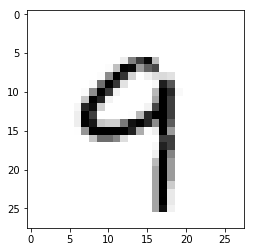

In [3]:
# plot one image and label
plt.imshow(mnist.train.images[8].reshape(28,28)).set_cmap('Greys')
print(mnist.train.labels[8])

In [4]:
# construct placeholders as the input ports to the graph
x = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])
#print x.__dict__

In [5]:
# define network trainable parameters
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
#print W.__dict__

In [6]:
# define graph operations
y_ = tf.nn.softmax(tf.matmul(x, W) + b)

In [7]:
# define loss (cross entropy loss -\sum y * log(y_))
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y * tf.log(y_), reduction_indices=[1]))

In [8]:
# define optimizer for training
train_optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(cross_entropy)

In [9]:
# define the operation that initializes variables
init = tf.global_variables_initializer()

In [10]:
# Launch the graph
with tf.Session() as sess:
    # initialization
    sess.run(init)
    
    # Train for 1000 iterations
    batch_size = 100
    training_iters = 1000
    for i in range(training_iters):
        # load a batch of data
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        
        # feed data into placeholder, run optimizer 
        _ = sess.run([train_optimizer], feed_dict={x: batch_x, y: batch_y})
        
        if i%100 == 0:
            print('Training iterations:', i)
    
    # Evaluate the trained model
    correct_prediction = tf.equal(tf.argmax(y_, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    # Calculate accuracy for 500 mnist test images
    accuracy_val = sess.run(accuracy, feed_dict={x: mnist.test.images[:500], y: mnist.test.labels[:500]})
    print('Testing Accuracy:', accuracy_val)

Training iterations: 0
Training iterations: 100
Training iterations: 200
Training iterations: 300
Training iterations: 400
Training iterations: 500
Training iterations: 600
Training iterations: 700
Training iterations: 800
Training iterations: 900
Testing Accuracy: 0.92
